In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("../data/raw/combat_results_lvl_5.csv")
df.head()

,Unnamed: 0,pc1_class,pc1_level,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,...,monster7_STR,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,winner,not_conscious_players_ratio,party_hp_ratio,difficulty
0,0,Barbarian,3,36,11,3,-1,2,0,-1,...,0,0,0,0,0,0,party,0.000000,0.884211,1
1,1,Barbarian,3,35,15,4,1,4,3,-1,...,0,0,0,0,0,0,monsters,1.000000,0.000000,6
2,2,Barbarian,3,33,15,4,2,3,3,1,...,0,0,0,0,0,0,party,0.000000,0.737864,2
3,3,Barbarian,3,30,10,2,-1,1,-1,-1,...,0,0,0,0,0,0,party,0.000000,0.544304,2
4,4,Barbarian,3,41,13,3,0,3,2,1,...,0,0,0,0,0,0,party,0.333333,0.208791,4


In [3]:
combats_df = df.drop([
    "Unnamed: 0",

    "monster1_name",
    "monster2_name",
    "monster3_name",
    "monster4_name",
    "monster5_name",
    "monster6_name",
    "monster7_name",

    "winner",
    "not_conscious_players_ratio",
    "party_hp_ratio"
], axis=1)

combats_df.head()

,pc1_class,pc1_level,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,pc1_CHA,...,monster7_cr,monster7_hp_max,monster7_ac,monster7_STR,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,difficulty
0,Barbarian,3,36,11,3,-1,2,0,-1,2,...,0.0,0,0,0,0,0,0,0,0,1
1,Barbarian,3,35,15,4,1,4,3,-1,0,...,0.0,0,0,0,0,0,0,0,0,6
2,Barbarian,3,33,15,4,2,3,3,1,3,...,0.0,0,0,0,0,0,0,0,0,2
3,Barbarian,3,30,10,2,-1,1,-1,-1,0,...,0.0,0,0,0,0,0,0,0,0,2
4,Barbarian,3,41,13,3,0,3,2,1,0,...,0.0,0,0,0,0,0,0,0,0,4


In [4]:
pc1_hp_max_scaler = StandardScaler()
pc2_hp_max_scaler = StandardScaler()
pc3_hp_max_scaler = StandardScaler()
pc4_hp_max_scaler = StandardScaler()
pc5_hp_max_scaler = StandardScaler()
pc6_hp_max_scaler = StandardScaler()
pc7_hp_max_scaler = StandardScaler()

monster1_hp_max_scaler = StandardScaler()
monster2_hp_max_scaler = StandardScaler()
monster3_hp_max_scaler = StandardScaler()
monster4_hp_max_scaler = StandardScaler()
monster5_hp_max_scaler = StandardScaler()
monster6_hp_max_scaler = StandardScaler()
monster7_hp_max_scaler = StandardScaler()

pc1_ac_scaler = StandardScaler()
pc2_ac_scaler = StandardScaler()
pc3_ac_scaler = StandardScaler()
pc4_ac_scaler = StandardScaler()
pc5_ac_scaler = StandardScaler()
pc6_ac_scaler = StandardScaler()
pc7_ac_scaler = StandardScaler()

monster1_ac_scaler = StandardScaler()
monster2_ac_scaler = StandardScaler()
monster3_ac_scaler = StandardScaler()
monster4_ac_scaler = StandardScaler()
monster5_ac_scaler = StandardScaler()
monster6_ac_scaler = StandardScaler()
monster7_ac_scaler = StandardScaler()

combats_df["pc1_hp_max"] = pc1_hp_max_scaler.fit_transform(combats_df[["pc1_hp_max"]])
combats_df["pc2_hp_max"] = pc2_hp_max_scaler.fit_transform(combats_df[["pc2_hp_max"]])
combats_df["pc3_hp_max"] = pc3_hp_max_scaler.fit_transform(combats_df[["pc3_hp_max"]])
combats_df["pc4_hp_max"] = pc4_hp_max_scaler.fit_transform(combats_df[["pc4_hp_max"]])
combats_df["pc5_hp_max"] = pc5_hp_max_scaler.fit_transform(combats_df[["pc5_hp_max"]])
combats_df["pc6_hp_max"] = pc6_hp_max_scaler.fit_transform(combats_df[["pc6_hp_max"]])
combats_df["pc7_hp_max"] = pc7_hp_max_scaler.fit_transform(combats_df[["pc7_hp_max"]])

combats_df["monster1_hp_max"] = monster1_hp_max_scaler.fit_transform(combats_df[["monster1_hp_max"]])
combats_df["monster2_hp_max"] = monster2_hp_max_scaler.fit_transform(combats_df[["monster2_hp_max"]])
combats_df["monster3_hp_max"] = monster3_hp_max_scaler.fit_transform(combats_df[["monster3_hp_max"]])
combats_df["monster4_hp_max"] = monster4_hp_max_scaler.fit_transform(combats_df[["monster4_hp_max"]])
combats_df["monster5_hp_max"] = monster5_hp_max_scaler.fit_transform(combats_df[["monster5_hp_max"]])
combats_df["monster6_hp_max"] = monster6_hp_max_scaler.fit_transform(combats_df[["monster6_hp_max"]])
combats_df["monster7_hp_max"] = monster7_hp_max_scaler.fit_transform(combats_df[["monster7_hp_max"]])

combats_df["pc1_ac"] = pc1_ac_scaler.fit_transform(combats_df[["pc1_ac"]])
combats_df["pc2_ac"] = pc2_ac_scaler.fit_transform(combats_df[["pc2_ac"]])
combats_df["pc3_ac"] = pc3_ac_scaler.fit_transform(combats_df[["pc3_ac"]])
combats_df["pc4_ac"] = pc4_ac_scaler.fit_transform(combats_df[["pc4_ac"]])
combats_df["pc5_ac"] = pc5_ac_scaler.fit_transform(combats_df[["pc5_ac"]])
combats_df["pc6_ac"] = pc6_ac_scaler.fit_transform(combats_df[["pc6_ac"]])
combats_df["pc7_ac"] = pc7_ac_scaler.fit_transform(combats_df[["pc7_ac"]])

combats_df["monster1_ac"] = monster1_ac_scaler.fit_transform(combats_df[["monster1_ac"]])
combats_df["monster2_ac"] = monster2_ac_scaler.fit_transform(combats_df[["monster2_ac"]])
combats_df["monster3_ac"] = monster3_ac_scaler.fit_transform(combats_df[["monster3_ac"]])
combats_df["monster4_ac"] = monster4_ac_scaler.fit_transform(combats_df[["monster4_ac"]])
combats_df["monster5_ac"] = monster5_ac_scaler.fit_transform(combats_df[["monster5_ac"]])
combats_df["monster6_ac"] = monster6_ac_scaler.fit_transform(combats_df[["monster6_ac"]])
combats_df["monster7_ac"] = monster7_ac_scaler.fit_transform(combats_df[["monster7_ac"]])

combats_df

,pc1_class,pc1_level,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,pc1_CHA,...,monster7_cr,monster7_hp_max,monster7_ac,monster7_STR,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,difficulty
0,Barbarian,3,0.622581,-0.436880,3,-1,2,0,-1,2,...,0.0,-0.302885,-0.402572,0,0,0,0,0,0,1
1,Barbarian,3,0.551031,1.684542,4,1,4,3,-1,0,...,0.0,-0.302885,-0.402572,0,0,0,0,0,0,6
2,Barbarian,3,0.407932,1.684542,4,2,3,3,1,3,...,0.0,-0.302885,-0.402572,0,0,0,0,0,0,2
3,Barbarian,3,0.193284,-0.967236,2,-1,1,-1,-1,0,...,0.0,-0.302885,-0.402572,0,0,0,0,0,0,2
4,Barbarian,3,0.980328,0.623831,3,0,3,2,1,0,...,0.0,-0.302885,-0.402572,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,FighterStr,2,-0.522210,-1.497592,4,-1,3,2,0,0,...,3.0,2.096074,2.885071,3,1,2,-2,1,-2,8
599996,FighterStr,2,-0.450661,-1.497592,4,-1,3,0,-1,1,...,3.0,2.096074,2.885071,3,1,2,-2,1,-2,8
599997,FighterStr,2,-0.236013,-0.967236,2,0,2,-1,0,1,...,3.0,2.096074,2.885071,3,1,2,-2,1,-2,8
599998,FighterStr,2,-0.522210,0.093475,3,2,3,2,3,2,...,3.0,2.096074,2.885071,3,1,2,-2,1,-2,8


In [5]:
pc1_STR_scaler = StandardScaler()
pc1_DEX_scaler = StandardScaler()
pc1_CON_scaler = StandardScaler()
pc1_INT_scaler = StandardScaler()
pc1_WIS_scaler = StandardScaler()
pc1_CHA_scaler = StandardScaler()

pc2_STR_scaler = StandardScaler()
pc2_DEX_scaler = StandardScaler()
pc2_CON_scaler = StandardScaler()
pc2_INT_scaler = StandardScaler()
pc2_WIS_scaler = StandardScaler()
pc2_CHA_scaler = StandardScaler()

pc3_STR_scaler = StandardScaler()
pc3_DEX_scaler = StandardScaler()
pc3_CON_scaler = StandardScaler()
pc3_INT_scaler = StandardScaler()
pc3_WIS_scaler = StandardScaler()
pc3_CHA_scaler = StandardScaler()

pc4_STR_scaler = StandardScaler()
pc4_DEX_scaler = StandardScaler()
pc4_CON_scaler = StandardScaler()
pc4_INT_scaler = StandardScaler()
pc4_WIS_scaler = StandardScaler()
pc4_CHA_scaler = StandardScaler()

pc5_STR_scaler = StandardScaler()
pc5_DEX_scaler = StandardScaler()
pc5_CON_scaler = StandardScaler()
pc5_INT_scaler = StandardScaler()
pc5_WIS_scaler = StandardScaler()
pc5_CHA_scaler = StandardScaler()

pc6_STR_scaler = StandardScaler()
pc6_DEX_scaler = StandardScaler()
pc6_CON_scaler = StandardScaler()
pc6_INT_scaler = StandardScaler()
pc6_WIS_scaler = StandardScaler()
pc6_CHA_scaler = StandardScaler()

pc7_STR_scaler = StandardScaler()
pc7_DEX_scaler = StandardScaler()
pc7_CON_scaler = StandardScaler()
pc7_INT_scaler = StandardScaler()
pc7_WIS_scaler = StandardScaler()
pc7_CHA_scaler = StandardScaler()

monster1_STR_scaler = StandardScaler()
monster1_DEX_scaler = StandardScaler()
monster1_CON_scaler = StandardScaler()
monster1_INT_scaler = StandardScaler()
monster1_WIS_scaler = StandardScaler()
monster1_CHA_scaler = StandardScaler()

monster2_STR_scaler = StandardScaler()
monster2_DEX_scaler = StandardScaler()
monster2_CON_scaler = StandardScaler()
monster2_INT_scaler = StandardScaler()
monster2_WIS_scaler = StandardScaler()
monster2_CHA_scaler = StandardScaler()

monster3_STR_scaler = StandardScaler()
monster3_DEX_scaler = StandardScaler()
monster3_CON_scaler = StandardScaler()
monster3_INT_scaler = StandardScaler()
monster3_WIS_scaler = StandardScaler()
monster3_CHA_scaler = StandardScaler()

monster4_STR_scaler = StandardScaler()
monster4_DEX_scaler = StandardScaler()
monster4_CON_scaler = StandardScaler()
monster4_INT_scaler = StandardScaler()
monster4_WIS_scaler = StandardScaler()
monster4_CHA_scaler = StandardScaler()

monster5_STR_scaler = StandardScaler()
monster5_DEX_scaler = StandardScaler()
monster5_CON_scaler = StandardScaler()
monster5_INT_scaler = StandardScaler()
monster5_WIS_scaler = StandardScaler()
monster5_CHA_scaler = StandardScaler()

monster6_STR_scaler = StandardScaler()
monster6_DEX_scaler = StandardScaler()
monster6_CON_scaler = StandardScaler()
monster6_INT_scaler = StandardScaler()
monster6_WIS_scaler = StandardScaler()
monster6_CHA_scaler = StandardScaler()

monster7_STR_scaler = StandardScaler()
monster7_DEX_scaler = StandardScaler()
monster7_CON_scaler = StandardScaler()
monster7_INT_scaler = StandardScaler()
monster7_WIS_scaler = StandardScaler()
monster7_CHA_scaler = StandardScaler()

combats_df["pc1_STR"] = pc1_STR_scaler.fit_transform(combats_df[["pc1_STR"]])
combats_df["pc1_DEX"] = pc1_DEX_scaler.fit_transform(combats_df[["pc1_DEX"]])
combats_df["pc1_CON"] = pc1_CON_scaler.fit_transform(combats_df[["pc1_CON"]])
combats_df["pc1_INT"] = pc1_INT_scaler.fit_transform(combats_df[["pc1_INT"]])
combats_df["pc1_WIS"] = pc1_WIS_scaler.fit_transform(combats_df[["pc1_WIS"]])
combats_df["pc1_CHA"] = pc1_CHA_scaler.fit_transform(combats_df[["pc1_CHA"]])

combats_df["pc2_STR"] = pc2_STR_scaler.fit_transform(combats_df[["pc2_STR"]])
combats_df["pc2_DEX"] = pc2_DEX_scaler.fit_transform(combats_df[["pc2_DEX"]])
combats_df["pc2_CON"] = pc2_CON_scaler.fit_transform(combats_df[["pc2_CON"]])
combats_df["pc2_INT"] = pc2_INT_scaler.fit_transform(combats_df[["pc2_INT"]])
combats_df["pc2_WIS"] = pc2_WIS_scaler.fit_transform(combats_df[["pc2_WIS"]])
combats_df["pc2_CHA"] = pc2_CHA_scaler.fit_transform(combats_df[["pc2_CHA"]])

combats_df["pc3_STR"] = pc3_STR_scaler.fit_transform(combats_df[["pc3_STR"]])
combats_df["pc3_DEX"] = pc3_DEX_scaler.fit_transform(combats_df[["pc3_DEX"]])
combats_df["pc3_CON"] = pc3_CON_scaler.fit_transform(combats_df[["pc3_CON"]])
combats_df["pc3_INT"] = pc3_INT_scaler.fit_transform(combats_df[["pc3_INT"]])
combats_df["pc3_WIS"] = pc3_WIS_scaler.fit_transform(combats_df[["pc3_WIS"]])
combats_df["pc3_CHA"] = pc3_CHA_scaler.fit_transform(combats_df[["pc3_CHA"]])

combats_df["pc4_STR"] = pc4_STR_scaler.fit_transform(combats_df[["pc4_STR"]])
combats_df["pc4_DEX"] = pc4_DEX_scaler.fit_transform(combats_df[["pc4_DEX"]])
combats_df["pc4_CON"] = pc4_CON_scaler.fit_transform(combats_df[["pc4_CON"]])
combats_df["pc4_INT"] = pc4_INT_scaler.fit_transform(combats_df[["pc4_INT"]])
combats_df["pc4_WIS"] = pc4_WIS_scaler.fit_transform(combats_df[["pc4_WIS"]])
combats_df["pc4_CHA"] = pc4_CHA_scaler.fit_transform(combats_df[["pc4_CHA"]])

combats_df["pc5_STR"] = pc5_STR_scaler.fit_transform(combats_df[["pc5_STR"]])
combats_df["pc5_DEX"] = pc5_DEX_scaler.fit_transform(combats_df[["pc5_DEX"]])
combats_df["pc5_CON"] = pc5_CON_scaler.fit_transform(combats_df[["pc5_CON"]])
combats_df["pc5_INT"] = pc5_INT_scaler.fit_transform(combats_df[["pc5_INT"]])
combats_df["pc5_WIS"] = pc5_WIS_scaler.fit_transform(combats_df[["pc5_WIS"]])
combats_df["pc5_CHA"] = pc5_CHA_scaler.fit_transform(combats_df[["pc5_CHA"]])

combats_df["pc6_STR"] = pc6_STR_scaler.fit_transform(combats_df[["pc6_STR"]])
combats_df["pc6_DEX"] = pc6_DEX_scaler.fit_transform(combats_df[["pc6_DEX"]])
combats_df["pc6_CON"] = pc6_CON_scaler.fit_transform(combats_df[["pc6_CON"]])
combats_df["pc6_INT"] = pc6_INT_scaler.fit_transform(combats_df[["pc6_INT"]])
combats_df["pc6_WIS"] = pc6_WIS_scaler.fit_transform(combats_df[["pc6_WIS"]])
combats_df["pc6_CHA"] = pc6_CHA_scaler.fit_transform(combats_df[["pc6_CHA"]])

combats_df["pc7_STR"] = pc7_STR_scaler.fit_transform(combats_df[["pc7_STR"]])
combats_df["pc7_DEX"] = pc7_DEX_scaler.fit_transform(combats_df[["pc7_DEX"]])
combats_df["pc7_CON"] = pc7_CON_scaler.fit_transform(combats_df[["pc7_CON"]])
combats_df["pc7_INT"] = pc7_INT_scaler.fit_transform(combats_df[["pc7_INT"]])
combats_df["pc7_WIS"] = pc7_WIS_scaler.fit_transform(combats_df[["pc7_WIS"]])
combats_df["pc7_CHA"] = pc7_CHA_scaler.fit_transform(combats_df[["pc7_CHA"]])

combats_df["monster1_STR"] = monster1_STR_scaler.fit_transform(combats_df[["monster1_STR"]])
combats_df["monster1_DEX"] = monster1_DEX_scaler.fit_transform(combats_df[["monster1_DEX"]])
combats_df["monster1_CON"] = monster1_CON_scaler.fit_transform(combats_df[["monster1_CON"]])
combats_df["monster1_INT"] = monster1_INT_scaler.fit_transform(combats_df[["monster1_INT"]])
combats_df["monster1_WIS"] = monster1_WIS_scaler.fit_transform(combats_df[["monster1_WIS"]])
combats_df["monster1_CHA"] = monster1_CHA_scaler.fit_transform(combats_df[["monster1_CHA"]])

combats_df["monster2_STR"] = monster2_STR_scaler.fit_transform(combats_df[["monster2_STR"]])
combats_df["monster2_DEX"] = monster2_DEX_scaler.fit_transform(combats_df[["monster2_DEX"]])
combats_df["monster2_CON"] = monster2_CON_scaler.fit_transform(combats_df[["monster2_CON"]])
combats_df["monster2_INT"] = monster2_INT_scaler.fit_transform(combats_df[["monster2_INT"]])
combats_df["monster2_WIS"] = monster2_WIS_scaler.fit_transform(combats_df[["monster2_WIS"]])
combats_df["monster2_CHA"] = monster2_CHA_scaler.fit_transform(combats_df[["monster2_CHA"]])

combats_df["monster3_STR"] = monster3_STR_scaler.fit_transform(combats_df[["monster3_STR"]])
combats_df["monster3_DEX"] = monster3_DEX_scaler.fit_transform(combats_df[["monster3_DEX"]])
combats_df["monster3_CON"] = monster3_CON_scaler.fit_transform(combats_df[["monster3_CON"]])
combats_df["monster3_INT"] = monster3_INT_scaler.fit_transform(combats_df[["monster3_INT"]])
combats_df["monster3_WIS"] = monster3_WIS_scaler.fit_transform(combats_df[["monster3_WIS"]])
combats_df["monster3_CHA"] = monster3_CHA_scaler.fit_transform(combats_df[["monster3_CHA"]])

combats_df["monster4_STR"] = monster4_STR_scaler.fit_transform(combats_df[["monster4_STR"]])
combats_df["monster4_DEX"] = monster4_DEX_scaler.fit_transform(combats_df[["monster4_DEX"]])
combats_df["monster4_CON"] = monster4_CON_scaler.fit_transform(combats_df[["monster4_CON"]])
combats_df["monster4_INT"] = monster4_INT_scaler.fit_transform(combats_df[["monster4_INT"]])
combats_df["monster4_WIS"] = monster4_WIS_scaler.fit_transform(combats_df[["monster4_WIS"]])
combats_df["monster4_CHA"] = monster4_CHA_scaler.fit_transform(combats_df[["monster4_CHA"]])

combats_df["monster5_STR"] = monster5_STR_scaler.fit_transform(combats_df[["monster5_STR"]])
combats_df["monster5_DEX"] = monster5_DEX_scaler.fit_transform(combats_df[["monster5_DEX"]])
combats_df["monster5_CON"] = monster5_CON_scaler.fit_transform(combats_df[["monster5_CON"]])
combats_df["monster5_INT"] = monster5_INT_scaler.fit_transform(combats_df[["monster5_INT"]])
combats_df["monster5_WIS"] = monster5_WIS_scaler.fit_transform(combats_df[["monster5_WIS"]])
combats_df["monster5_CHA"] = monster5_CHA_scaler.fit_transform(combats_df[["monster5_CHA"]])

combats_df["monster6_STR"] = monster6_STR_scaler.fit_transform(combats_df[["monster6_STR"]])
combats_df["monster6_DEX"] = monster6_DEX_scaler.fit_transform(combats_df[["monster6_DEX"]])
combats_df["monster6_CON"] = monster6_CON_scaler.fit_transform(combats_df[["monster6_CON"]])
combats_df["monster6_INT"] = monster6_INT_scaler.fit_transform(combats_df[["monster6_INT"]])
combats_df["monster6_WIS"] = monster6_WIS_scaler.fit_transform(combats_df[["monster6_WIS"]])
combats_df["monster6_CHA"] = monster6_CHA_scaler.fit_transform(combats_df[["monster6_CHA"]])

combats_df["monster7_STR"] = monster7_STR_scaler.fit_transform(combats_df[["monster7_STR"]])
combats_df["monster7_DEX"] = monster7_DEX_scaler.fit_transform(combats_df[["monster7_DEX"]])
combats_df["monster7_CON"] = monster7_CON_scaler.fit_transform(combats_df[["monster7_CON"]])
combats_df["monster7_INT"] = monster7_INT_scaler.fit_transform(combats_df[["monster7_INT"]])
combats_df["monster7_WIS"] = monster7_WIS_scaler.fit_transform(combats_df[["monster7_WIS"]])
combats_df["monster7_CHA"] = monster7_CHA_scaler.fit_transform(combats_df[["monster7_CHA"]])

combats_df

,pc1_class,pc1_level,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,pc1_CHA,...,monster7_cr,monster7_hp_max,monster7_ac,monster7_STR,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,difficulty
0,Barbarian,3,0.622581,-0.436880,0.057568,-1.215963,-0.029611,-0.469772,-1.216790,0.196139,...,0.0,-0.302885,-0.402572,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,1
1,Barbarian,3,0.551031,1.684542,0.601633,0.279073,1.336617,1.771880,-1.216790,-0.813754,...,0.0,-0.302885,-0.402572,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,6
2,Barbarian,3,0.407932,1.684542,0.601633,1.026592,0.653503,1.771880,0.278646,0.701086,...,0.0,-0.302885,-0.402572,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,2
3,Barbarian,3,0.193284,-0.967236,-0.486496,-1.215963,-0.712725,-1.216989,-1.216790,-0.813754,...,0.0,-0.302885,-0.402572,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,2
4,Barbarian,3,0.980328,0.623831,0.057568,-0.468445,0.653503,1.024663,0.278646,-0.813754,...,0.0,-0.302885,-0.402572,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,FighterStr,2,-0.522210,-1.497592,0.601633,-1.215963,0.653503,1.024663,-0.469072,-0.813754,...,3.0,2.096074,2.885071,2.670826,1.179142,2.575720,-1.535485,2.157345,-1.985630,8
599996,FighterStr,2,-0.450661,-1.497592,0.601633,-1.215963,0.653503,-0.469772,-1.216790,-0.308808,...,3.0,2.096074,2.885071,2.670826,1.179142,2.575720,-1.535485,2.157345,-1.985630,8
599997,FighterStr,2,-0.236013,-0.967236,-0.486496,-0.468445,-0.029611,-1.216989,-0.469072,-0.308808,...,3.0,2.096074,2.885071,2.670826,1.179142,2.575720,-1.535485,2.157345,-1.985630,8
599998,FighterStr,2,-0.522210,0.093475,0.057568,1.026592,0.653503,1.024663,1.774082,0.196139,...,3.0,2.096074,2.885071,2.670826,1.179142,2.575720,-1.535485,2.157345,-1.985630,8


In [6]:
combats_df["pc_lvl"] = combats_df["pc1_level"]

combats_df = combats_df.drop([
    "pc1_level",
    "pc2_level",
    "pc3_level",
    "pc4_level",
    "pc5_level",
    "pc6_level",
    "pc7_level"
], axis=1)

combats_df.head()

/tmp/ipykernel_228122/3511484481.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combats_df["pc_lvl"] = combats_df["pc1_level"]


,pc1_class,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,pc1_CHA,pc2_class,...,monster7_hp_max,monster7_ac,monster7_STR,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,difficulty,pc_lvl
0,Barbarian,0.622581,-0.436880,0.057568,-1.215963,-0.029611,-0.469772,-1.216790,0.196139,Barbarian,...,-0.302885,-0.402572,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,1,3
1,Barbarian,0.551031,1.684542,0.601633,0.279073,1.336617,1.771880,-1.216790,-0.813754,Barbarian,...,-0.302885,-0.402572,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,6,3
2,Barbarian,0.407932,1.684542,0.601633,1.026592,0.653503,1.771880,0.278646,0.701086,Barbarian,...,-0.302885,-0.402572,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,2,3
3,Barbarian,0.193284,-0.967236,-0.486496,-1.215963,-0.712725,-1.216989,-1.216790,-0.813754,Barbarian,...,-0.302885,-0.402572,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,2,3
4,Barbarian,0.980328,0.623831,0.057568,-0.468445,0.653503,1.024663,0.278646,-0.813754,Barbarian,...,-0.302885,-0.402572,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,4,3


In [7]:
combats_df.columns

Index(['pc1_class', 'pc1_hp_max', 'pc1_ac', 'pc1_STR', 'pc1_DEX', 'pc1_CON',
       'pc1_INT', 'pc1_WIS', 'pc1_CHA', 'pc2_class',
       ...
       'monster7_hp_max', 'monster7_ac', 'monster7_STR', 'monster7_DEX',
       'monster7_CON', 'monster7_INT', 'monster7_WIS', 'monster7_CHA',
       'difficulty', 'pc_lvl'],
      dtype='object', length=128)

In [8]:
num_pcs_col = []
pc_aux_df = combats_df[[
    "pc1_class",
    "pc2_class",
    "pc3_class",
    "pc4_class",
    "pc5_class",
    "pc6_class",
    "pc7_class",
]]

for i in range(len(pc_aux_df)):
    num_pcs = 0

    row = pd.DataFrame(pc_aux_df.iloc[i])
    row.columns = ["col"]

    for i in row["col"]:
        if i == "-":
            continue
        num_pcs += 1

    num_pcs_col.append(num_pcs)


num_monsters_col = []
monsters_aux_df = combats_df[[
    "monster1_cr",
    "monster2_cr",
    "monster3_cr",
    "monster4_cr",
    "monster5_cr",
    "monster6_cr",
    "monster7_cr"
]]

for i in range(len(monsters_aux_df)):
    num_monsters = 0

    row = pd.DataFrame(monsters_aux_df.iloc[i])
    row.columns = ["col"]

    for i in row["col"]:
        if i == 0.0:
            continue
        num_monsters += 1

    num_monsters_col.append(num_monsters)

combats_df["num_pcs"] = num_pcs_col
combats_df["num_monsters"] = num_monsters_col
combats_df.head()

/tmp/ipykernel_228122/2377353951.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combats_df["num_pcs"] = num_pcs_col
/tmp/ipykernel_228122/2377353951.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combats_df["num_monsters"] = num_monsters_col


,pc1_class,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,pc1_CHA,pc2_class,...,monster7_STR,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,difficulty,pc_lvl,num_pcs,num_monsters
0,Barbarian,0.622581,-0.436880,0.057568,-1.215963,-0.029611,-0.469772,-1.216790,0.196139,Barbarian,...,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,1,3,3,4
1,Barbarian,0.551031,1.684542,0.601633,0.279073,1.336617,1.771880,-1.216790,-0.813754,Barbarian,...,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,6,3,3,4
2,Barbarian,0.407932,1.684542,0.601633,1.026592,0.653503,1.771880,0.278646,0.701086,Barbarian,...,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,2,3,3,4
3,Barbarian,0.193284,-0.967236,-0.486496,-1.215963,-0.712725,-1.216989,-1.216790,-0.813754,Barbarian,...,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,2,3,3,4
4,Barbarian,0.980328,0.623831,0.057568,-0.468445,0.653503,1.024663,0.278646,-0.813754,Barbarian,...,-0.180133,-0.225267,-0.300064,0.268933,-0.068749,0.207326,4,3,3,4


In [9]:
pc1_classes = pd.get_dummies(combats_df["pc1_class"], prefix="pc1", dtype=int)
pc2_classes = pd.get_dummies(combats_df["pc2_class"], prefix="pc2", dtype=int)
pc3_classes = pd.get_dummies(combats_df["pc3_class"], prefix="pc3", dtype=int)
pc4_classes = pd.get_dummies(combats_df["pc4_class"], prefix="pc4", dtype=int)
pc5_classes = pd.get_dummies(combats_df["pc5_class"], prefix="pc5", dtype=int)
pc6_classes = pd.get_dummies(combats_df["pc6_class"], prefix="pc6", dtype=int)
pc7_classes = pd.get_dummies(combats_df["pc7_class"], prefix="pc7", dtype=int)

combats_df = pd.concat([combats_df, pc1_classes], axis=1)
combats_df = pd.concat([combats_df, pc2_classes], axis=1)
combats_df = pd.concat([combats_df, pc3_classes], axis=1)
combats_df = pd.concat([combats_df, pc4_classes], axis=1)
combats_df = pd.concat([combats_df, pc5_classes], axis=1)
combats_df = pd.concat([combats_df, pc6_classes], axis=1)
combats_df = pd.concat([combats_df, pc7_classes], axis=1)

combats_df

,pc1_class,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,pc1_CHA,pc2_class,...,pc5_Bard,pc5_FighterStr,pc6_-,pc6_Barbarian,pc6_Bard,pc6_FighterStr,pc7_-,pc7_Barbarian,pc7_Bard,pc7_FighterStr
0,Barbarian,0.622581,-0.436880,0.057568,-1.215963,-0.029611,-0.469772,-1.216790,0.196139,Barbarian,...,0,0,1,0,0,0,1,0,0,0
1,Barbarian,0.551031,1.684542,0.601633,0.279073,1.336617,1.771880,-1.216790,-0.813754,Barbarian,...,0,0,1,0,0,0,1,0,0,0
2,Barbarian,0.407932,1.684542,0.601633,1.026592,0.653503,1.771880,0.278646,0.701086,Barbarian,...,0,0,1,0,0,0,1,0,0,0
3,Barbarian,0.193284,-0.967236,-0.486496,-1.215963,-0.712725,-1.216989,-1.216790,-0.813754,Barbarian,...,0,0,1,0,0,0,1,0,0,0
4,Barbarian,0.980328,0.623831,0.057568,-0.468445,0.653503,1.024663,0.278646,-0.813754,Barbarian,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,FighterStr,-0.522210,-1.497592,0.601633,-1.215963,0.653503,1.024663,-0.469072,-0.813754,Bard,...,0,0,1,0,0,0,1,0,0,0
599996,FighterStr,-0.450661,-1.497592,0.601633,-1.215963,0.653503,-0.469772,-1.216790,-0.308808,Bard,...,0,0,1,0,0,0,1,0,0,0
599997,FighterStr,-0.236013,-0.967236,-0.486496,-0.468445,-0.029611,-1.216989,-0.469072,-0.308808,Bard,...,0,0,1,0,0,0,1,0,0,0
599998,FighterStr,-0.522210,0.093475,0.057568,1.026592,0.653503,1.024663,1.774082,0.196139,Bard,...,0,0,1,0,0,0,1,0,0,0


In [10]:
combats_df = combats_df.drop([
    "pc1_class",
    "pc2_class",
    "pc3_class",
    "pc4_class",
    "pc5_class",
    "pc6_class",
    "pc7_class"
], axis=1)

combats_df.head()

,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,pc1_CHA,pc2_hp_max,pc2_ac,...,pc5_Bard,pc5_FighterStr,pc6_-,pc6_Barbarian,pc6_Bard,pc6_FighterStr,pc7_-,pc7_Barbarian,pc7_Bard,pc7_FighterStr
0,0.622581,-0.436880,0.057568,-1.215963,-0.029611,-0.469772,-1.216790,0.196139,0.407842,0.855801,...,0,0,1,0,0,0,1,0,0,0
1,0.551031,1.684542,0.601633,0.279073,1.336617,1.771880,-1.216790,-0.813754,-0.151664,0.187277,...,0,0,1,0,0,0,1,0,0,0
2,0.407932,1.684542,0.601633,1.026592,0.653503,1.771880,0.278646,0.701086,0.843013,0.855801,...,0,0,1,0,0,0,1,0,0,0
3,0.193284,-0.967236,-0.486496,-1.215963,-0.712725,-1.216989,-1.216790,-0.813754,0.097005,1.078642,...,0,0,1,0,0,0,1,0,0,0
4,0.980328,0.623831,0.057568,-0.468445,0.653503,1.024663,0.278646,-0.813754,-0.151664,-0.035565,...,0,0,1,0,0,0,1,0,0,0


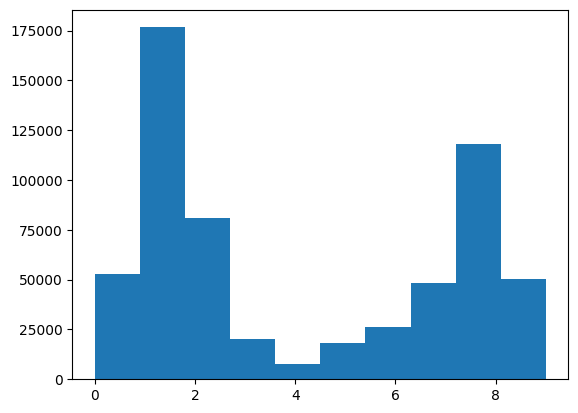

In [11]:
plt.hist(combats_df["difficulty"])
plt.show()

In [12]:
binned_difficulty = []

for i in range(len(combats_df["difficulty"])):
    if combats_df["difficulty"][i] in [0, 1]:
        binned_difficulty.append(0)
    elif combats_df["difficulty"][i] in [2, 3]:
        binned_difficulty.append(1)
    elif combats_df["difficulty"][i] in [4, 5]:
        binned_difficulty.append(2)
    elif combats_df["difficulty"][i] in [6, 7]:
        binned_difficulty.append(3)
    elif combats_df["difficulty"][i] in [8, 9]:
        binned_difficulty.append(4)

combats_df["difficulty"] = binned_difficulty

combats_df.head()

,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,pc1_CHA,pc2_hp_max,pc2_ac,...,pc5_Bard,pc5_FighterStr,pc6_-,pc6_Barbarian,pc6_Bard,pc6_FighterStr,pc7_-,pc7_Barbarian,pc7_Bard,pc7_FighterStr
0,0.622581,-0.436880,0.057568,-1.215963,-0.029611,-0.469772,-1.216790,0.196139,0.407842,0.855801,...,0,0,1,0,0,0,1,0,0,0
1,0.551031,1.684542,0.601633,0.279073,1.336617,1.771880,-1.216790,-0.813754,-0.151664,0.187277,...,0,0,1,0,0,0,1,0,0,0
2,0.407932,1.684542,0.601633,1.026592,0.653503,1.771880,0.278646,0.701086,0.843013,0.855801,...,0,0,1,0,0,0,1,0,0,0
3,0.193284,-0.967236,-0.486496,-1.215963,-0.712725,-1.216989,-1.216790,-0.813754,0.097005,1.078642,...,0,0,1,0,0,0,1,0,0,0
4,0.980328,0.623831,0.057568,-0.468445,0.653503,1.024663,0.278646,-0.813754,-0.151664,-0.035565,...,0,0,1,0,0,0,1,0,0,0


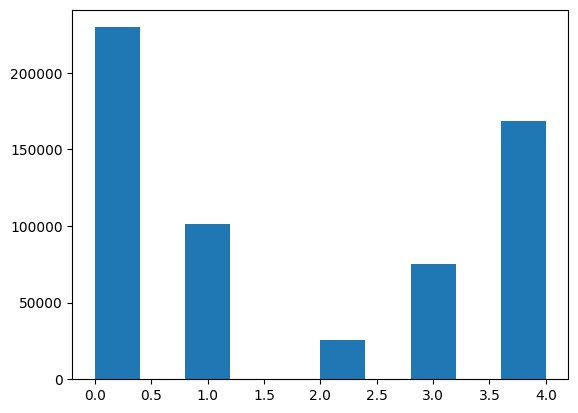

In [13]:
plt.hist(combats_df["difficulty"])
plt.show()

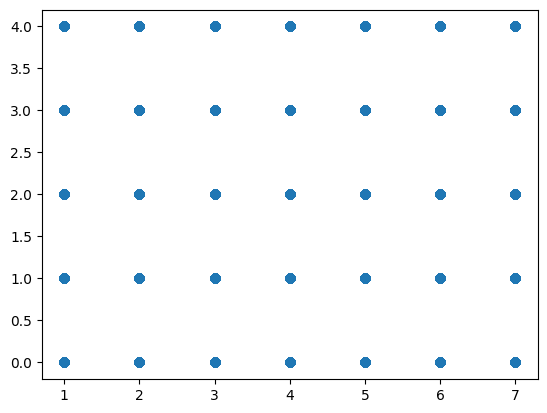

In [14]:
plt.scatter(
    combats_df["num_pcs"],
    combats_df["difficulty"],
    alpha=0.2
)
plt.show()

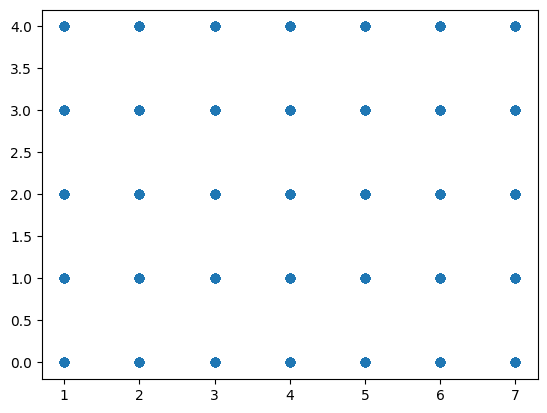

In [15]:
plt.scatter(
    combats_df["num_monsters"],
    combats_df["difficulty"],
    alpha=0.1
)
plt.show()

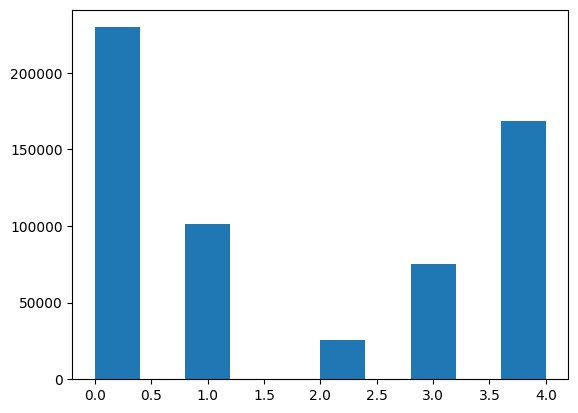

In [16]:
plt.hist(combats_df["difficulty"])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X = combats_df.drop("difficulty", axis=1)
y = combats_df["difficulty"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

ada = SMOTE (random_state=42)
print("Haciendo resampling...")
X_resample, y_resample  = ada.fit_resample( X_train, y_train )

print(Counter(y_resample))

# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

# rus = RandomUnderSampler( random_state = 42 )
# X_resample, y_resample = rus.fit_resample(X_train, y_train)

# print(Counter(y_resample))

Haciendo resampling...


# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_resample, y_resample)

LinearRegression()

In [20]:
lr.score(X_resample, y_resample)

0.7083483940755161

In [21]:
y_pred = lr.predict(X_test)

y_pred = np.round(y_pred)
y_pred
accuracy_score(y_test, y_pred)

0.3912333333333333

# Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight=class_weights)

dt.fit(X_resample, y_resample)

dt.score(X_resample, y_resample)

0.9999978377677113

In [23]:
y_pred = dt.predict(X_test)

accuracy_score(y_pred,y_test)

0.6806166666666666

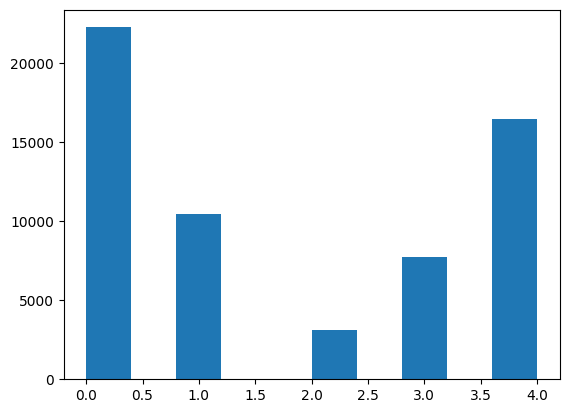

In [24]:
plt.hist(y_pred)
plt.show()

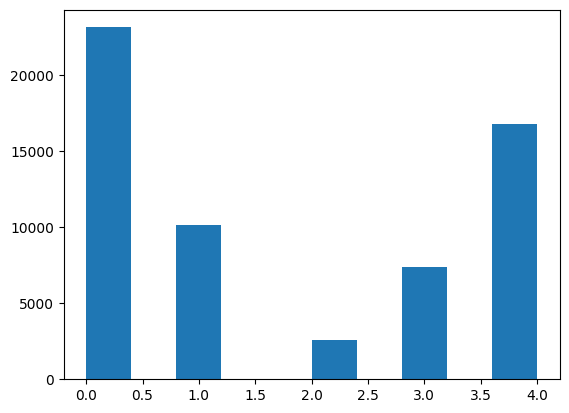

In [25]:
plt.hist(y_test)
plt.show()

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 20, class_weight=class_weights)

rf.fit(X_resample, y_resample)

rf.score(X_resample, y_resample)

0.8849562688519628

In [27]:
y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7289666666666667

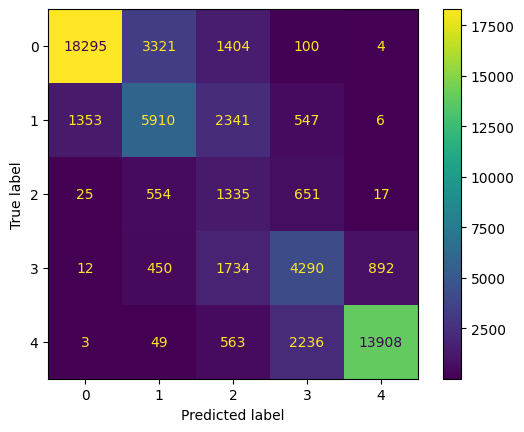

In [28]:
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

con = confusion_matrix( y_test , y_pred )
disp = ConfusionMatrixDisplay( confusion_matrix = con,  display_labels = range(5) ).plot()
plt.show()

# XGBoost

In [29]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.00001,
    subsample=0.8,
    colsample_bytree=0.5,
    random_state=42,
    class_weight=class_weights
)

model.fit(X_resample, y_resample)

model.score(X_resample, y_resample)

/mnt/5228752828750BEB/Maestría/semestre_2/aprendizaje_automatico/Foresight/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:30:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.7277848410757947

In [30]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7273

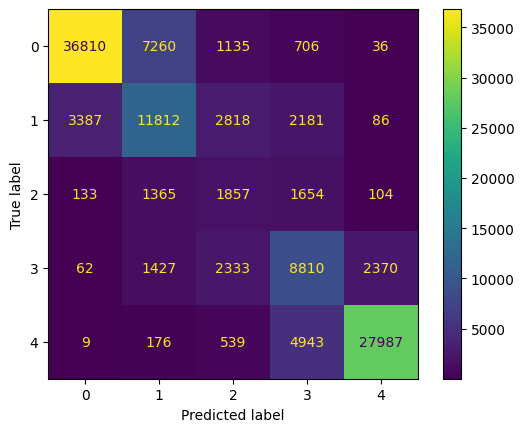

In [31]:
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

con = confusion_matrix( y_test , y_pred )
disp = ConfusionMatrixDisplay( confusion_matrix = con,  display_labels = range(5) ).plot()
plt.show()

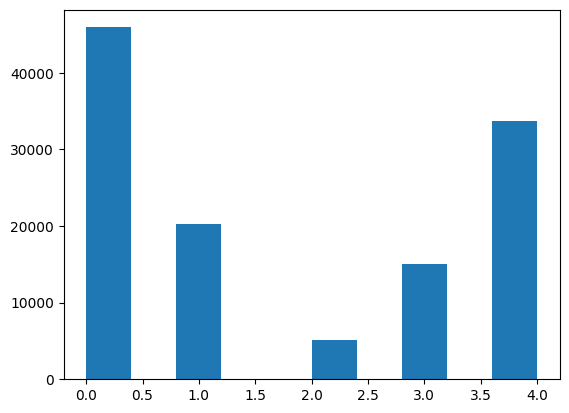

In [32]:
plt.hist(y_test)
plt.show()

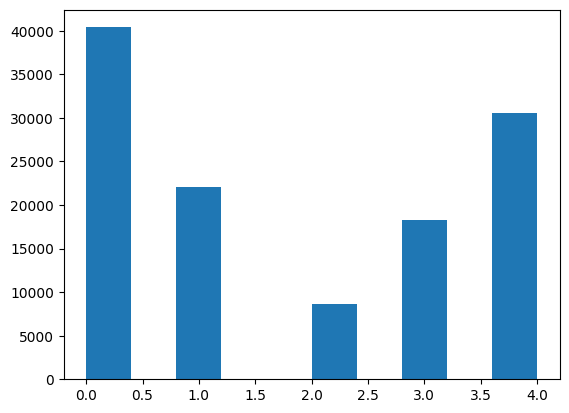

In [33]:
plt.hist(y_pred)
plt.show()

# Red Neuronal

In [34]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input

import keras_tuner as kt

2025-04-24 20:37:24.825581: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-24 20:37:26.612360: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-24 20:37:27.539880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745552248.394128  129339 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745552248.598261  129339 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745552250.303099  129339 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [40]:
def build_model(hp):
    model = Sequential()
    model.add( Input(  shape=(X_resample.shape[1],)) )


    for i in range(hp.Int("num_layers", 1, 2)):  # Tune the number of layers.
        model.add(
            Dense(
                units      = hp.Int   (f'units_{i}', min_value=20, max_value=50, step=2 ), # <--- [1..15]
                activation = hp.Choice(f"activation_{i}", ["relu","leaky_relu"]),
            )
        )

    model.add( Dense( 5, activation = 'softmax', name = "predictions" ) ) # <---- capa de salida

    lr = hp.Choice( 'lr', values=[1e-2, 1e-3, 1e-4] )
    optimizers_dict = {
        "Adam":    keras.optimizers.Adam(learning_rate=lr),
        "SGD":     keras.optimizers.SGD(learning_rate=lr),
        "Adagrad": keras.optimizers.Adagrad(learning_rate=lr)
        }

    hp_optimizers = hp.Choice(
        'optimizer',
        values=[ "SGD", "Adam", "Adagrad"]
        )

    model.compile( optimizer    = optimizers_dict[hp_optimizers],
                    loss      = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                    metrics   = ["accuracy", tf.keras.metrics.AUC(name="AUC", multi_label = True)]
                    )

    return model

In [41]:
build_model(kt.HyperParameters())

<Sequential name=sequential_1, built=True>

In [42]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)

In [43]:
tuner = kt.RandomSearch( # https://keras.io/api/keras_tuner/tuners/hyperband/
    build_model,
    objective            = kt.Objective('val_accuracy', direction='max'),
    executions_per_trial = 1,
  # max_epochs           = 50,
    max_trials           = 20,
  # factor               = 3,
    directory            = 'salida',
    project_name         = 'foresight_nn',
    overwrite            = True
)

# tuner = kt.Hyperband(
#     build_model,
#     objective            = kt.Objective("val_accuracy", direction="max"),
#     max_epochs           = 5,
#     factor               = 3,
#     directory            = 'salida',
#     project_name         = 'foresight_nn',
#     overwrite            = True
# )

In [44]:
hist = tuner.search(X_resample, y_resample, validation_split=0.2, callbacks=[earlyStopping], verbose=1 )

Trial 20 Complete [00h 00m 08s]
val_accuracy: 0.008019560016691685

Best val_accuracy So Far: 0.35574573278427124
Total elapsed time: 00h 02m 31s


In [45]:
best_hps = tuner.get_best_hyperparameters()[0]
print(f"BEST PARAMETERS:")
print(f"Densa1: {best_hps['units_0']} - Activation: {best_hps['activation_0']}")
print(f"Learning Rate: {best_hps['lr']}")

BEST PARAMETERS:
Densa1: 22 - Activation: relu
Learning Rate: 0.0001


In [46]:
best_hps = tuner.get_best_hyperparameters()[0]
mi_mejor_modelo = tuner.hypermodel.build(best_hps)

In [47]:
mi_mejor_modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 22)             │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 5)              │           115 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,415 (13.34 KB)

 Trainable params: 3,415 (13.34 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
historial = mi_mejor_modelo.fit(X_train, y_train, validation_split=0.2,  epochs=20,  verbose=1 )

Epoch 1/20
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - AUC: 0.4805 - accuracy: 0.1716 - loss: 2.0690 - val_AUC: 0.5014 - val_accuracy: 0.3235 - val_loss: 1.6299
Epoch 2/20
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - AUC: 0.5059 - accuracy: 0.3563 - loss: 1.5796 - val_AUC: 0.5141 - val_accuracy: 0.4375 - val_loss: 1.4521
Epoch 3/20
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - AUC: 0.5172 - accuracy: 0.4547 - loss: 1.4292 - val_AUC: 0.5223 - val_accuracy: 0.5002 - val_loss: 1.3552
Epoch 4/20
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - AUC: 0.5249 - accuracy: 0.5070 - loss: 1.3421 - val_AUC: 0.5290 - val_accuracy: 0.5361 - val_loss: 1.2902
Epoch 5/20
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - AUC: 0.5311 - accuracy: 0.5415 - loss: 1.2791 - val_AUC: 0.5349 - val_accuracy: 0.5580 - val_loss: 1.2417
Epoch 6/20
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - AUC: 0.5374 - accuracy: 0.5595 - loss: 1.2371 - val_AUC: 0.5404 - val_accuracy: 0.5732 - val_loss: 1.2032
Epoch 7/20

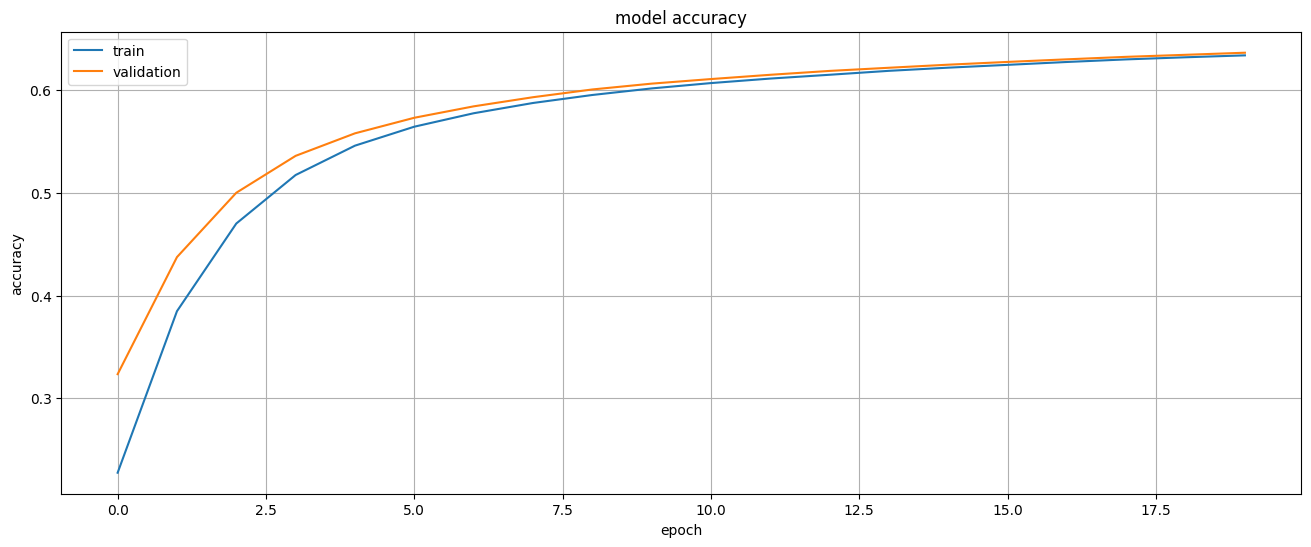

In [49]:
def plot_hist(hist):
    plt.figure(figsize=(16,6))
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    #plt.ylim((0,1))
    plt.grid()
    plt.show()

plot_hist(historial)

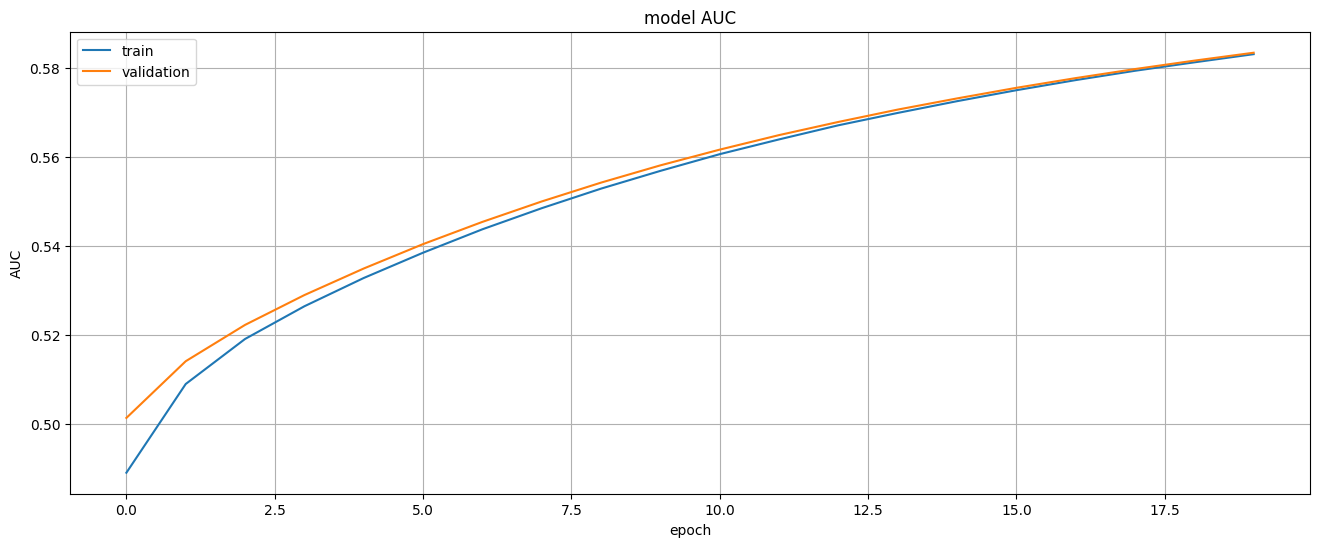

In [50]:
def plot_hist_auc(hist):
    plt.figure(figsize=(16,6))
    plt.plot(hist.history["AUC"])
    plt.plot(hist.history["val_AUC"])
    plt.title("model AUC")
    plt.ylabel("AUC")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    #plt.ylim((0,1))
    plt.grid()
    plt.show()

plot_hist_auc(historial)

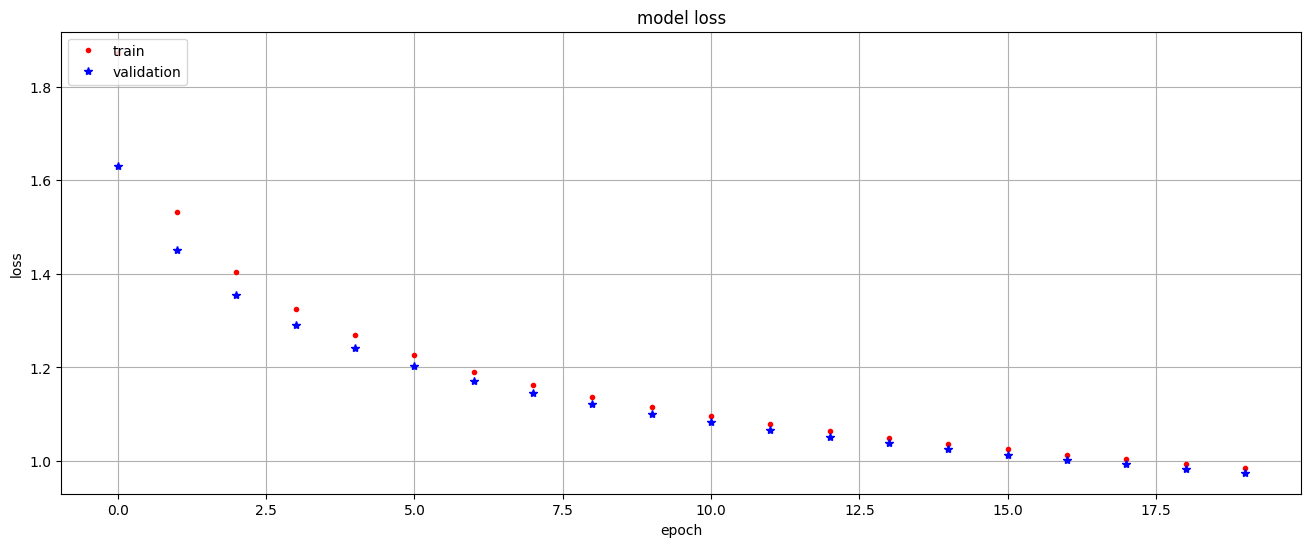

In [51]:
def plot_hist_loss(hist):
    plt.figure(figsize=(16,6))
    plt.plot(hist.history["loss"],'.r')
    plt.plot(hist.history["val_loss"],'*b')
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    #plt.ylim((0,1))
    plt.grid()
    plt.show()

plot_hist_loss(historial)

In [52]:
mi_mejor_modelo.evaluate(X_test, y_test)

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.5823 - accuracy: 0.6353 - loss: 0.9811


[0.9793409705162048, 0.6352083086967468, 0.5831959843635559]

In [53]:
prediccion_test = mi_mejor_modelo.predict(X_test)

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 678us/step


In [54]:
prediccion_test

array([[0.4348129 , 0.21231276, 0.10569174, 0.1252998 , 0.12188265],
       [0.14674021, 0.15025628, 0.23756745, 0.30797598, 0.15746003],
       [0.08686692, 0.11880171, 0.09759417, 0.20201315, 0.494724  ],
       ...,
       [0.21287496, 0.25288084, 0.19999611, 0.2747901 , 0.05945798],
       [0.5448516 , 0.08629139, 0.0779808 , 0.07895466, 0.21192145],
       [0.1277378 , 0.08336986, 0.02617768, 0.3798963 , 0.38281834]],
      dtype=float32)

In [55]:
y_pred = np.argmax(prediccion_test, axis=1)
y_pred

array([0, 3, 4, ..., 3, 0, 4])

In [56]:
unique_elements, count_elements = np.unique(np.round(y_pred),return_counts=True)
print(unique_elements)
print(count_elements)

[0 1 2 3 4]
[57348  8992   707  6857 46096]


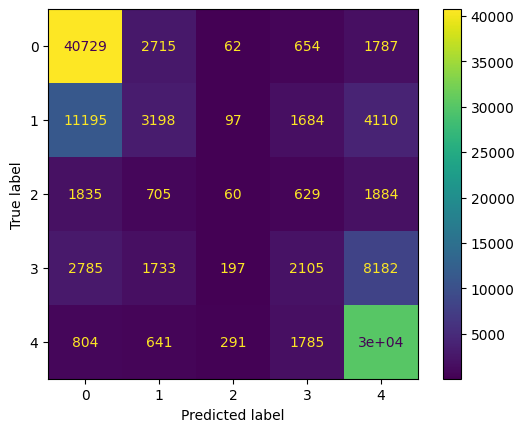

In [57]:
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

con = confusion_matrix( y_test , y_pred )
disp = ConfusionMatrixDisplay( confusion_matrix = con,  display_labels = range(5) ).plot()
plt.show()

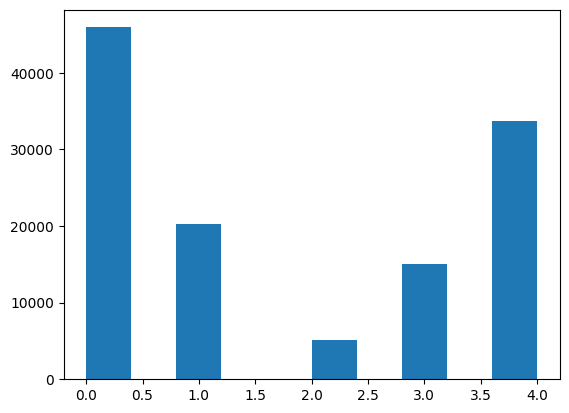

In [58]:
plt.hist(y_test)
plt.show()

(array([57348.,     0.,  8992.,     0.,     0.,   707.,     0.,  6857.,
            0., 46096.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

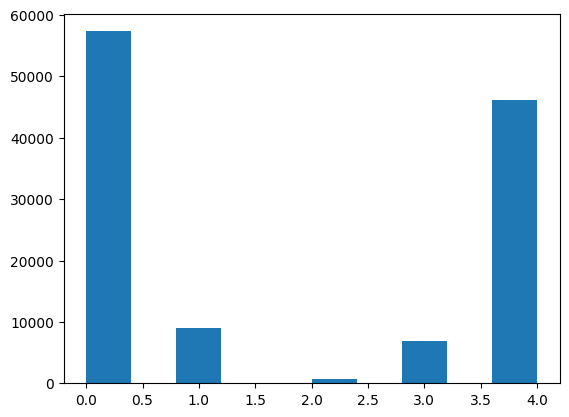

In [59]:
plt.hist(y_pred)